<a href="https://colab.research.google.com/github/Bborub/streamlit/blob/main/Bertha_Claude_12Aug24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.0 MB/s eta 0:00:00


In [2]:
import yt_dlp

ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
    'outtmpl': 'bertha.%(ext)s'
}

youtube_url = "https://www.youtube.com/watch?v=RaYfA7tfT1g"

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([youtube_url])

print("Download complete!")

[youtube] Extracting URL: https://www.youtube.com/watch?v=RaYfA7tfT1g
[youtube] RaYfA7tfT1g: Downloading webpage
[youtube] RaYfA7tfT1g: Downloading ios player API JSON
[youtube] RaYfA7tfT1g: Downloading web creator player API JSON
[youtube] RaYfA7tfT1g: Downloading player 37b24ccb
[youtube] RaYfA7tfT1g: Downloading m3u8 information
[info] RaYfA7tfT1g: Downloading 1 format(s): 251
[download] Destination: bertha.webm
[download] 100% of    5.14MiB in 00:00:00 at 31.28MiB/s  
[ExtractAudio] Destination: bertha.mp3
Deleting original file bertha.webm (pass -k to keep)
Download complete!


Duration: 343.20 seconds
Sample rate: 22050 Hz


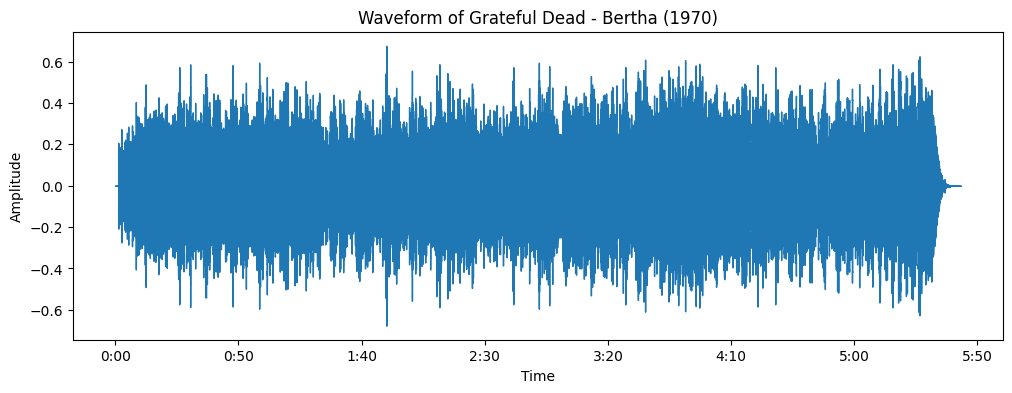

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
y, sr = librosa.load('bertha.mp3')

# Print basic information
duration = librosa.get_duration(y=y, sr=sr)
print(f"Duration: {duration:.2f} seconds")
print(f"Sample rate: {sr} Hz")

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of Grateful Dead - Bertha (1970)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

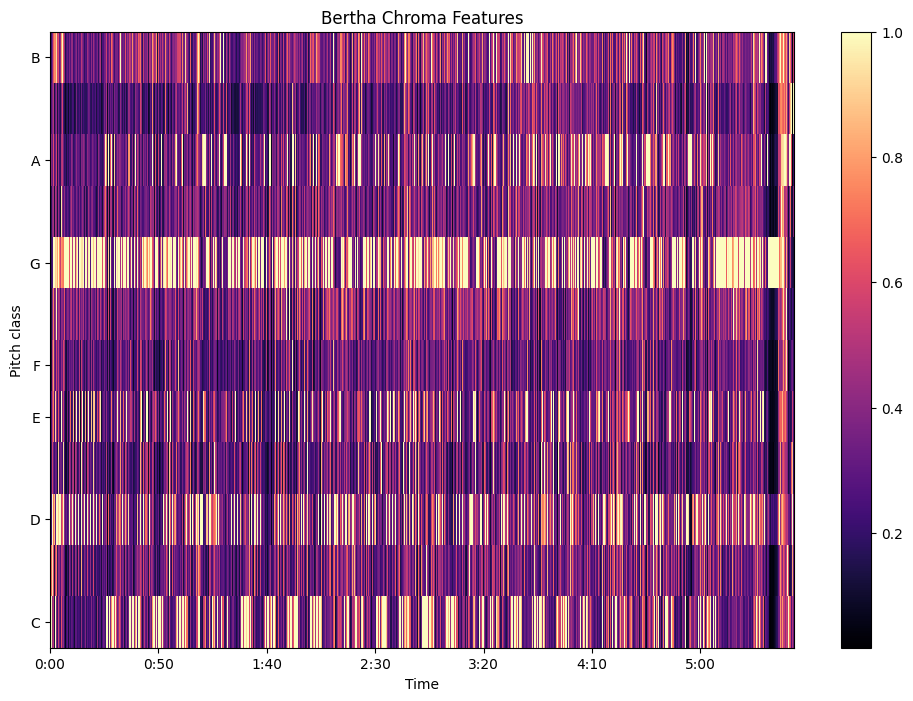

In [4]:
# Compute chroma features
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# Plot chroma
plt.figure(figsize=(12, 8))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.title('Bertha Chroma Features')
plt.colorbar()
plt.show()

In [5]:
import librosa

# Load the audio file
y, sr = librosa.load('bertha.mp3')

print(f"Audio duration: {librosa.get_duration(y=y, sr=sr):.2f} seconds")
print(f"Sample rate: {sr} Hz")
print(f"Number of samples: {len(y)}")

Audio duration: 343.20 seconds
Sample rate: 22050 Hz
Number of samples: 7567617


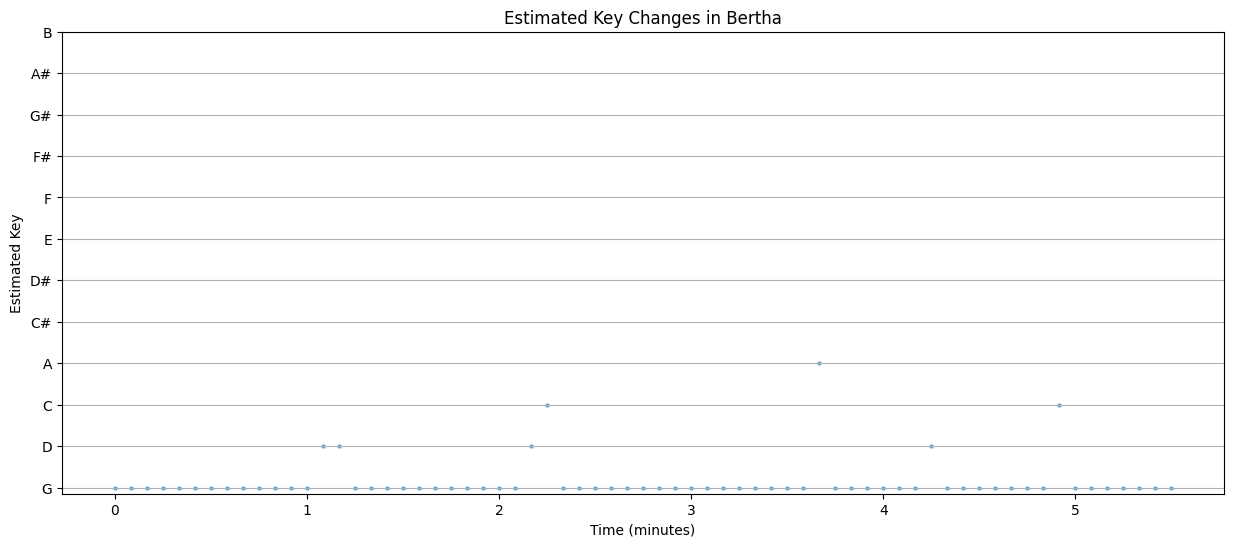

Potential key changes:
Time: 1.08 minutes - Potential key change from G to D
Time: 1.25 minutes - Potential key change from D to G
Time: 2.17 minutes - Potential key change from G to D
Time: 2.25 minutes - Potential key change from D to C
Time: 2.33 minutes - Potential key change from C to G
Time: 3.67 minutes - Potential key change from G to A
Time: 3.75 minutes - Potential key change from A to G
Time: 4.25 minutes - Potential key change from G to D
Time: 4.33 minutes - Potential key change from D to G
Time: 4.92 minutes - Potential key change from G to C
Time: 5.00 minutes - Potential key change from C to G


In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load('bertha.mp3')

# Compute chroma features
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# Define key names
key_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Function to estimate key from chroma
def estimate_key(chroma_segment):
    return key_names[np.argmax(np.sum(chroma_segment, axis=1))]

# Estimate key for each 10-second segment
segment_duration = 10  # seconds
hop_duration = 5  # seconds
samples_per_segment = segment_duration * sr
hop_length = hop_duration * sr

key_changes = []
times = []

for start in range(0, len(y) - samples_per_segment, hop_length):
    segment = y[start:start + samples_per_segment]
    chroma_segment = librosa.feature.chroma_cqt(y=segment, sr=sr)
    key = estimate_key(chroma_segment)
    key_changes.append(key)
    times.append(start / sr)

# Plot key changes
plt.figure(figsize=(15, 6))
plt.scatter(times, key_changes, alpha=0.5, s=5)
plt.yticks(key_names)
plt.xlabel('Time (minutes)')
plt.ylabel('Estimated Key')
plt.title('Estimated Key Changes in Bertha')
plt.xticks(np.arange(0, max(times), 60), [f'{int(t/60)}' for t in range(0, int(max(times)), 60)])
plt.grid(True, axis='y')
plt.show()

# Print significant key changes
print("Potential key changes:")
prev_key = key_changes[0]
for i, key in enumerate(key_changes):
    if key != prev_key:
        print(f"Time: {times[i]/60:.2f} minutes - Potential key change from {prev_key} to {key}")
        prev_key = key

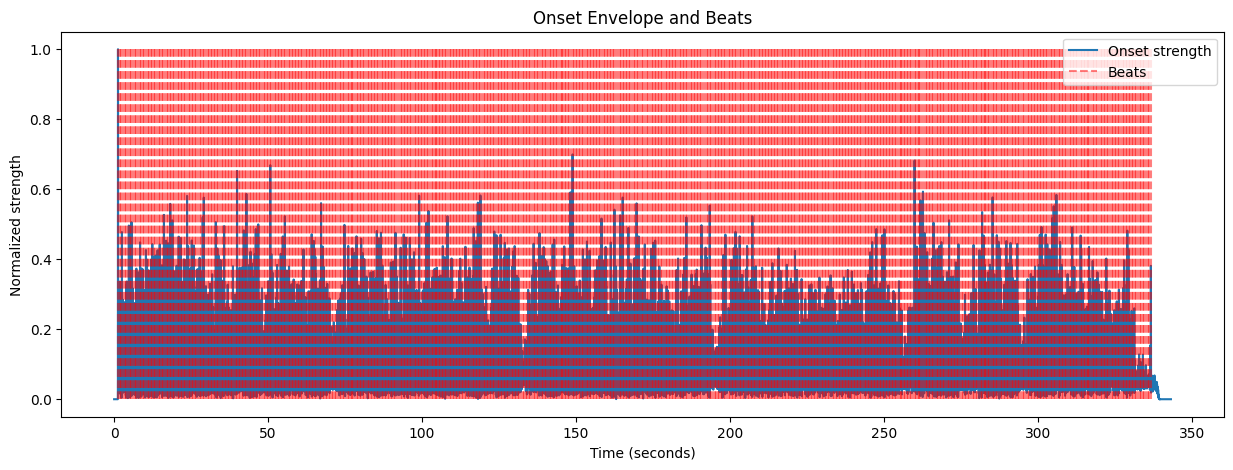

Number of detected beats: 663
Average time between beats: 0.507 seconds

Tempo statistics:
Minimum local tempo: 92.3 BPM
Maximum local tempo: 143.6 BPM
Average tempo: 118.7 BPM
Median tempo: 117.5 BPM
Standard deviation of tempo: 5.2 BPM


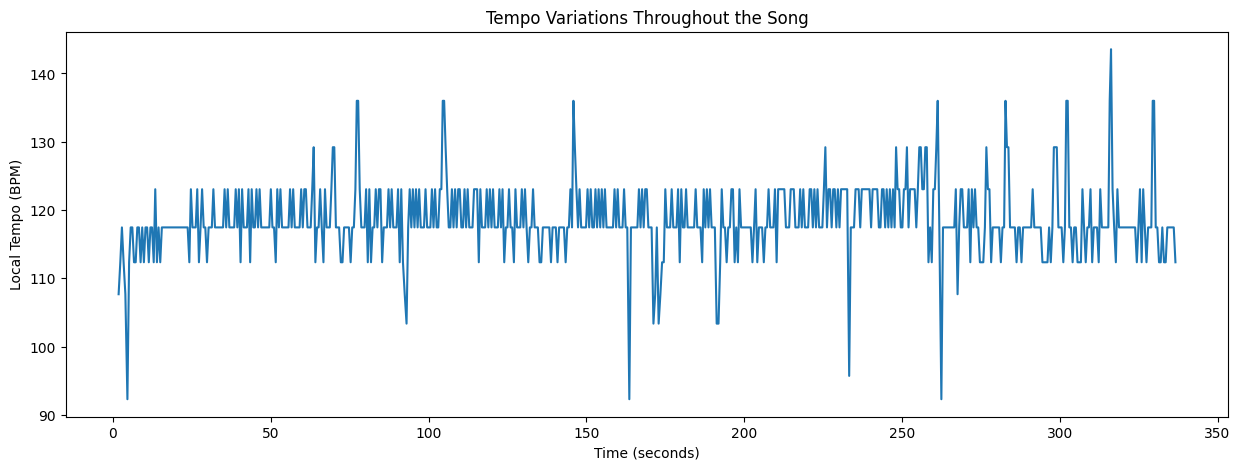

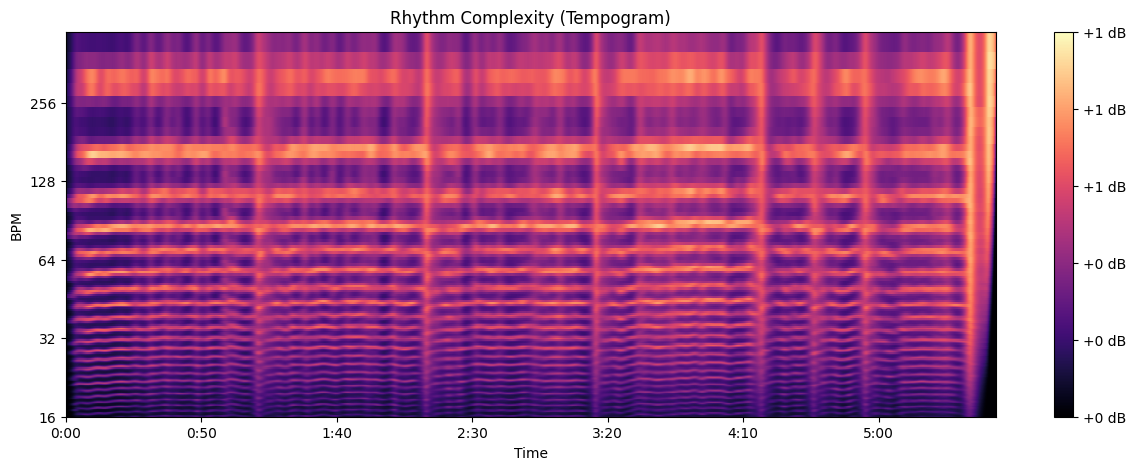

In [7]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load('bertha.mp3')

# Compute onset envelope
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

# Detect beats
_, beat_frames = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

# Convert beat frames to time
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# Plot the onset envelope and beat events
plt.figure(figsize=(15, 5))
times = librosa.times_like(onset_env, sr=sr)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(beat_times, 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.xlabel('Time (seconds)')
plt.ylabel('Normalized strength')
plt.title('Onset Envelope and Beats')
plt.legend()
plt.show()

# Analyze rhythm
if len(beat_times) > 1:
    beat_intervals = np.diff(beat_times)
    local_tempos = 60 / beat_intervals

    print(f"Number of detected beats: {len(beat_frames)}")
    print(f"Average time between beats: {np.mean(beat_intervals):.3f} seconds")
    print(f"\nTempo statistics:")
    print(f"Minimum local tempo: {np.min(local_tempos):.1f} BPM")
    print(f"Maximum local tempo: {np.max(local_tempos):.1f} BPM")
    print(f"Average tempo: {np.mean(local_tempos):.1f} BPM")
    print(f"Median tempo: {np.median(local_tempos):.1f} BPM")
    print(f"Standard deviation of tempo: {np.std(local_tempos):.1f} BPM")

    # Plot tempo variations
    plt.figure(figsize=(15, 5))
    plt.plot(beat_times[1:], local_tempos)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Local Tempo (BPM)')
    plt.title('Tempo Variations Throughout the Song')
    plt.show()

# Analyze rhythm complexity
rhythm_complexity = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(rhythm_complexity, x_axis='time', y_axis='tempo')
plt.colorbar(format='%+2.0f dB')
plt.title('Rhythm Complexity (Tempogram)')
plt.show()